![University of Tehran](./img/UT.png)
#   <font color='red'><center>AI CA 2 - Game<center></font> 
## <center>Dr. Fadaei<center>
### <center>Daniyal Maroufi<center>
### <center>810098039<center>


## Aim

This assignment uses adversarial game algorithms such as minimax and alpha-beta pruning algorithms to play the Connect4 game against a computer. 

## Game

In [1]:
from random import random
from time import time
from matplotlib import pyplot as plt
import math
import copy
import pickle


In [2]:
class ConnectSin:
    YOU = 1
    CPU = -1
    EMPTY = 0
    DRAW = 0
    __CONNECT_NUMBER = 4
    board = None

    def __init__(self, board_size=(6, 7), silent=False):
        """
        The main class for the connect4 game

        Inputs
        ----------
        board_size : a tuple representing the board size in format: (rows, columns)
        silent     : whether the game prints outputs or not
        """
        assert len(board_size) == 2, "board size should be a 1*2 tuple"
        assert board_size[0] > 4 and board_size[1] > 4, "board size should be at least 5*5"

        self.columns = board_size[1]
        self.rows = board_size[0]
        self.silent = silent
        self.board_size = self.rows * self.columns

    def run(self, starter=None):
        """
        runs the game!

        Inputs
        ----------
        starter : either -1,1 or None. -1 if cpu starts the game, 1 if you start the game. None if you want the starter
            to be assigned randomly 

        Output
        ----------
        (int) either 1,0,-1. 1 meaning you have won, -1 meaning the player has won and 0 means that the game has drawn
        """
        if (not starter):
            starter = self.__get_random_starter()
        assert starter in [self.YOU, self.CPU], "starter value can only be 1,-1 or None"
        
        self.__init_board()
        turns_played = 0
        current_player = starter
        while(turns_played < self.board_size):
            
            if (current_player == self.YOU):
                self.__print_board()
                player_input = self.get_your_input()
            elif (current_player == self.CPU):
                player_input = self.__get_cpu_input()
            else:
                raise Exception("A problem has happend! contact no one, there is no fix!")
            if (not self.register_input(player_input, current_player)):
                self.__print("this move is invalid!")
                continue
            current_player = self.__change_turn(current_player)
            potential_winner = self.check_for_winners()
            turns_played += 1
            if (potential_winner != 0):
                self.__print_board()
                self.__print_winner_message(potential_winner)
                return potential_winner
        self.__print_board()
        self.__print("The game has ended in a draw!")
        return self.DRAW

    def get_your_input(self):
        """
        gets your input

        Output
        ----------
        (int) an integer between 1 and column count. the column to put a piece in
        """
        depth=1

        player=MiniMaxPlayer(self,depth,self.__CONNECT_NUMBER)
        return player.decision()

    def check_for_winners(self):
        """
        checks if anyone has won in this position

        Output
        ----------
        (int) either 1,0,-1. 1 meaning you have won, -1 meaning the player has won and 0 means that nothing has happened
        """
        have_you_won = self.check_if_player_has_won(self.YOU)
        if have_you_won:
            return self.YOU
        has_cpu_won = self.check_if_player_has_won(self.CPU)
        if has_cpu_won:
            return self.CPU
        return self.EMPTY

    def check_if_player_has_won(self, player_id):
        """
        checks if player with player_id has won

        Inputs
        ----------
        player_id : the id for the player to check

        Output
        ----------
        (boolean) true if the player has won in this position
        """
        return (
            self.__has_player_won_diagonally(player_id)
            or self.__has_player_won_horizentally(player_id)
            or self.__has_player_won_vertically(player_id)
        )
    
    def is_move_valid(self, move):
        """
        checks if this move can be played

        Inputs
        ----------
        move : the column to place a piece in, in range [1, column count]

        Output
        ----------
        (boolean) true if the move can be played
        """
        if (move < 1 or move > self.columns):
            return False
        column_index = move - 1
        return self.board[0][column_index] == 0
    
    def get_possible_moves(self):
        """
        returns a list of possible moves for the next move

        Output
        ----------
        (list) a list of numbers of columns that a piece can be placed in
        """
        possible_moves = []
        for i in range(self.columns):
            move = i + 1
            if (self.is_move_valid(move)):
                possible_moves.append(move)
        return possible_moves
    
    def register_input(self, player_input, current_player):
        """
        registers move to board, remember that this function changes the board

        Inputs
        ----------
        player_input : the column to place a piece in, in range [1, column count]
        current_player: ID of the current player, either self.YOU or self.CPU

        """
        if (not self.is_move_valid(player_input)):
            return False
        self.__drop_piece_in_column(player_input, current_player)
        return True

    def __init_board(self):
        self.board = []
        for i in range(self.rows):
            self.board.append([self.EMPTY] * self.columns)

    def __print(self, message: str):
        if not self.silent:
            print(message)

    def __has_player_won_horizentally(self, player_id):
        for i in range(self.rows):
            for j in range(self.columns - self.__CONNECT_NUMBER + 1):
                has_won = True
                for x in range(self.__CONNECT_NUMBER):
                    if self.board[i][j + x] != player_id:
                        has_won = False
                        break
                if has_won:
                    return True
        return False

    def __has_player_won_vertically(self, player_id):
        for i in range(self.rows - self.__CONNECT_NUMBER + 1):
            for j in range(self.columns):
                has_won = True
                for x in range(self.__CONNECT_NUMBER):
                    if self.board[i + x][j] != player_id:
                        has_won = False
                        break
                if has_won:
                    return True
        return False

    def __has_player_won_diagonally(self, player_id):
        for i in range(self.rows - self.__CONNECT_NUMBER + 1):
            for j in range(self.columns - self.__CONNECT_NUMBER + 1):
                has_won = True
                for x in range(self.__CONNECT_NUMBER):
                    if self.board[i + x][j + x] != player_id:
                        has_won = False
                        break
                if has_won:
                    return True
                has_won = True
                for x in range(self.__CONNECT_NUMBER):
                    if self.board[i + self.__CONNECT_NUMBER - 1 - x][j + x] != player_id:
                        has_won = False
                        break
                if has_won:
                    return True
        return False

    def __get_random_starter(self):
        players = [self.YOU, self.CPU]
        return players[int(random() * len(players))]
    
    def __get_cpu_input(self):
        """
        This is where clean code goes to die.
        """
        bb = copy.deepcopy(self.board)
        pm = self.get_possible_moves()
        for m in pm:
            self.register_input(m, self.CPU)
            if (self.check_if_player_has_won(self.CPU)):
                self.board = bb
                return m
            self.board = copy.deepcopy(bb)
        if (self.is_move_valid((self.columns // 2) + 1)):
            c = 0
            cl = (self.columns // 2) + 1
            for x in range(self.rows):
                if (self.board[x][cl] == self.CPU):
                    c += 1
            if (random() < 0.65):
                return cl
        return pm[int(random() * len(pm))]


    def __drop_piece_in_column(self, move, current_player):
        last_empty_space = 0
        column_index = move - 1
        for i in range(self.rows):
            if (self.board[i][column_index] == 0):
                last_empty_space = i
        self.board[last_empty_space][column_index] = current_player
        return True
        
    def __print_winner_message(self, winner):
        if (winner == self.YOU):
            self.__print("congrats! you have won!")
        else:
            self.__print("gg. CPU has won!")
    
    def __change_turn(self, turn):
        if (turn == self.YOU): 
            return self.CPU
        else:
            return self.YOU

    def __print_board(self):
        if (self.silent): return
        print("Y: you, C: CPU")
        for i in range(self.rows):
            for j in range(self.columns):
                house_char = "O"
                if (self.board[i][j] == self.YOU):
                    house_char = "Y"
                elif (self.board[i][j] == self.CPU):
                    house_char = "C"
                    
                print(f"{house_char}", end=" ")
            print()


## Node of Tree

In [3]:
class Node:
    utility=None
    parrent=None
    childs=[]
    move=0
    player=None

    def __init__(self, _board, _player):
        self.board=copy.deepcopy(_board)
        self.player=_player
        self.columns=len(self.board[0])
        self.rows=len(self.board)
    
    def get_possible_moves(self):
        """
        returns a list of possible moves for the next move

        Output
        ----------
        (list) a list of numbers of columns that a piece can be placed in
        """
        possible_moves = []
        for i in range(self.columns):
            move = i + 1
            if (self.is_move_valid(move)):
                possible_moves.append(move)
        return possible_moves
    
    def register_input(self, player_input):
        """
        registers move to board, remember that this function changes the board

        Inputs
        ----------
        player_input : the column to place a piece in, in range [1, column count]

        """
        if (not self.is_move_valid(player_input)):
            return False
        self.__drop_piece_in_column(player_input, self.player)
        return True

    def is_move_valid(self, move):
        """
        checks if this move can be played

        Inputs
        ----------
        move : the column to place a piece in, in range [1, column count]

        Output
        ----------
        (boolean) true if the move can be played
        """
        if (move < 1 or move > self.columns):
            return False
        column_index = move - 1
        return self.board[0][column_index] == 0
    
    def __drop_piece_in_column(self, move, current_player):
        last_empty_space = 0
        column_index = move - 1
        for i in range(self.rows):
            if (self.board[i][column_index] == 0):
                last_empty_space = i
        self.board[last_empty_space][column_index] = current_player
        return True


# Description of Utility Function

The agent should try to win the game (place four pieces in a vertical, horizontal, or diagonal line) and at the same time prevent the opponent from winning. Hence, we define the utility function as the difference in the score of the two agents.

The score of each agent is the sum of the placed pieces to create the Connect4 in a horizontal, vertical, or diagonal line. If we call our agent 'Y' and the opponent 'C', the score of 'Y' is three, and the agent 'C' is two in the following state. Because 'Y' has three ways to win, 'C' has two methods to win.

![score](./img/score.jpg)

# MiniMax Agent

In [28]:
class MiniMaxPlayer:
    def __init__(self,_game,_depth,_CONNECT_NUMBER):
        self.game=_game
        self.max_depth=_depth
        self.__CONNECT_NUMBER=_CONNECT_NUMBER

    def decision(self):
        # return 1
        root=Node(self.game.board, self.game.YOU)
        _, move=self.max_value(root)
        if move is None:
            print('move is None')

            print("Y: you, C: CPU")
            for i in range(self.game.rows):
                for j in range(self.game.columns):
                    house_char = "O"
                    if (self.game.board[i][j] == self.game.YOU):
                        house_char = "Y"
                    elif (self.game.board[i][j] == self.game.CPU):
                        house_char = "C"
                        
                    print(f"{house_char}", end=" ")
                print()


        return move


    def __change_turn(self, turn):
        if (turn == self.game.YOU): 
            return self.game.CPU
        else:
            return self.game.YOU

    def __has_player_won_horizentally(self, board, player_id):
        utility=0
        for i in range(self.game.rows):
            for j in range(self.game.columns - self.__CONNECT_NUMBER + 1):
                chance = True
                presence=0
                for x in range(self.__CONNECT_NUMBER):
                    if board[i][j + x] == self.__change_turn(player_id):
                        chance = False
                        presence+=1
                        break
                if chance:
                    utility+=1
                if presence==self.__CONNECT_NUMBER:
                    return math.inf
        return utility

    def __has_player_won_vertically(self,board, player_id):
        utility=0
        for i in range(self.game.rows - self.__CONNECT_NUMBER + 1):
            for j in range(self.game.columns):
                chance = True
                presence=0
                for x in range(self.__CONNECT_NUMBER):
                    if board[i + x][j] == self.__change_turn(player_id):
                        chance = False
                        presence+=1
                        break
                if chance:
                    utility+=1
                if presence==self.__CONNECT_NUMBER:
                    return math.inf
        return utility

    def __has_player_won_diagonally(self,board, player_id):
        utility=0
        for i in range(self.game.rows - self.__CONNECT_NUMBER + 1):
            for j in range(self.game.columns - self.__CONNECT_NUMBER + 1):
                chance = True
                precense=0
                for x in range(self.__CONNECT_NUMBER):
                    if board[i + x][j + x] == self.__change_turn(player_id):
                        chance = False
                        precense+=1
                        break
                if chance:
                    utility+=1
                if precense==self.__CONNECT_NUMBER:
                    return math.inf
                chance = True
                precense=0
                for x in range(self.__CONNECT_NUMBER):
                    if board[i + self.__CONNECT_NUMBER - 1 - x][j + x] == self.__change_turn(player_id):
                        chance = False
                        precense+=1
                        break
                if chance:
                    utility+=1
                if precense==self.__CONNECT_NUMBER:
                    return math.inf
        return utility

    def player_utility(self,board,turn):
        utility=self.__has_player_won_horizentally(board,turn)
        utility+=self.__has_player_won_vertically(board,turn)
        utility+=self.__has_player_won_diagonally(board,turn)
        return utility

    def utility(self,board,turn):
        return self.player_utility(board,turn)-self.player_utility(board,self.__change_turn(turn))

    def max_value(self, root, depth=0):
        if depth>self.max_depth:
            return (self.utility(root.board,self.game.YOU), root.move)

        best_move=(None,None)

        for move in root.get_possible_moves():
            child=Node(root.board,depth+1)
            child.register_input(move)
            child.move=move
            # child.parrent=root
            # root.childs.append(child)
            the_min=self.min_value(child, depth+1)
            if the_min[0] is None:
                continue
            action_utility, _=the_min[0], the_min[1]
            if best_move[0] is None:
                best_move=(action_utility, move)
            else:
                if action_utility>best_move[0]:
                    best_move=(action_utility, move)

        return best_move

    def min_value(self, root, depth=0):
        if depth>self.max_depth:
            return (self.utility(root.board,self.game.CPU), root.move)

        best_move=(None,None)

        for move in root.get_possible_moves():
            child=Node(root.board,depth+1)
            child.register_input(move)
            child.move=move
            # child.parrent=root
            # root.childs.append(child)
            the_max=self.max_value(child, depth+1)
            if the_max[0] is None:
                continue
            action_utility, _=the_max[0], the_max[1]
            if best_move[0] is None:
                best_move=(action_utility, move)
            else:
                if action_utility<best_move[0]:
                    best_move=(action_utility, move)

        if best_move[0] is None:
            return (math.inf, root.move)
        return best_move




## Results for Depth 3

In [ ]:
board_sizes_to_check = [(6,7), 
                        (7,8), 
                        (7,10)]

history=[]
for b_size in board_sizes_to_check:
    hist=[]
    for i in range(200):
        tic=time()
        game = ConnectSin(board_size=b_size,silent=True)
        a=game.run()
        toc=time()
        hist.append((toc-tic,a))
        print(b_size,'run:',i+1,',time:',toc-tic,'s r:',a)
    history.append((b_size,hist))



In [12]:

with open('history_depth3.pkl', 'wb') as dbfile:
    pickle.dump(history, dbfile)


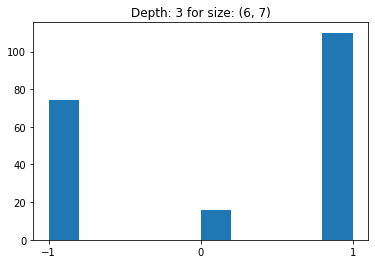

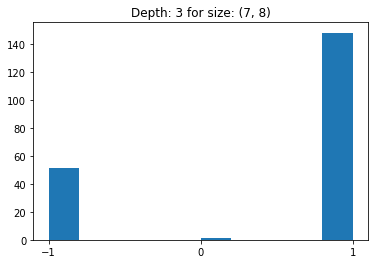

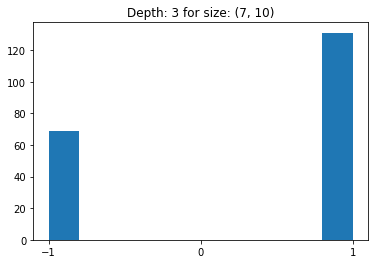

In [24]:

with open('history_depth3.pkl', 'rb') as dbfile:
    history=pickle.load(dbfile)

for b_size, hist in history:
    h=[a[1] for a in hist]
    plt.hist(h)
    plt.xticks([-1,0,1])
    plt.title('Depth: 3 for size: '+str(b_size))
    plt.show()


In [18]:

for b_size, hist in history:
    h=[a[1] for a in hist]
    wins=len([a for a in h if a==1])
    print('The winning chance of the agent for depth 3 and board size',b_size,'is', wins/200)


The winning chance of the agent for depth 3 and board size (6, 7) is 0.55
The winning chance of the agent for depth 3 and board size (7, 8) is 0.74
The winning chance of the agent for depth 3 and board size (7, 10) is 0.655


In [26]:
for b_size, hist in history:
    t=[a[0] for a in hist]
    total_time=sum([a for a in t])
    print('The total time to find the solution for depth 3 and board size',b_size,'is', total_time,' (s)')


The total time to find the solution for depth 3 and board size (6, 7) is 1176.7472474575043  (s)
The total time to find the solution for depth 3 and board size (7, 8) is 2363.0203046798706  (s)
The total time to find the solution for depth 3 and board size (7, 10) is 9616.12811422348  (s)


## Results for Depth 1

In [ ]:
board_sizes_to_check = [(6,7), 
                        (7,8), 
                        (7,10)]

history=[]
for b_size in board_sizes_to_check:
    hist=[]
    for i in range(200):
        tic=time()
        game = ConnectSin(board_size=b_size,silent=True)
        a=game.run()
        toc=time()
        hist.append((toc-tic,a))
        print(b_size,'run:',i+1,',time:',toc-tic,'s r:',a)
    history.append((b_size,hist))


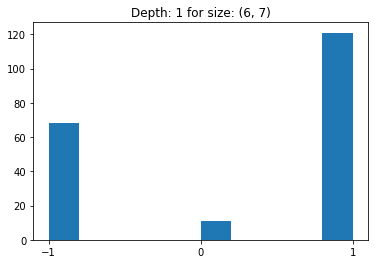

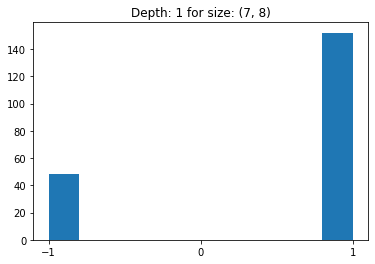

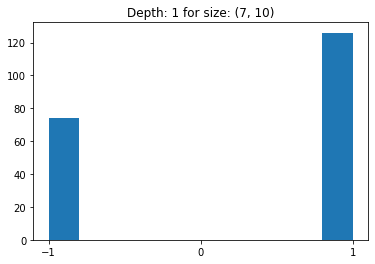

In [27]:

with open('history_depth1.pkl', 'rb') as dbfile:
    history=pickle.load(dbfile)

for b_size, hist in history:
    h=[a[1] for a in hist]
    plt.hist(h)
    plt.xticks([-1,0,1])
    plt.title('Depth: 1 for size: '+str(b_size))
    plt.show()


In [11]:

for b_size, hist in history:
    h=[a[1] for a in hist]
    wins=len([a for a in h if a==1])
    print('The winning chance of the agent for depth 1 and board size',b_size,'is', wins/200)


The winning chance of the agent for depth 1 and board size (6, 7) is 0.605
The winning chance of the agent for depth 1 and board size (7, 8) is 0.76
The winning chance of the agent for depth 1 and board size (7, 10) is 0.63


As the board size increases, the time consumption of the algorithm increases. Also, As we increase the search depth, it takes more time to find the solution. But the algorithm finds better solutions and its chance of winning increases as it considers deeper states. 

In [28]:
for b_size, hist in history:
    t=[a[0] for a in hist]
    total_time=sum([a for a in t])
    print('The total time to find the solution for depth 1 and board size',b_size,'is', total_time)


The total time to find the solution for depth 1 and board size (6, 7) is 32.22557353973389
The total time to find the solution for depth 1 and board size (7, 8) is 37.4440336227417
The total time to find the solution for depth 1 and board size (7, 10) is 99.9102873802185


# Alpha-Beta Pruning MiniMax Agent

In [4]:
class AlphaBetaMiniMaxPlayer:
    def __init__(self,_game,_depth,_CONNECT_NUMBER):
        self.game=_game
        self.max_depth=_depth
        self.__CONNECT_NUMBER=_CONNECT_NUMBER

    def decision(self):
        # return 1
        root=Node(self.game.board, self.game.YOU)
        _, move=self.max_value(root,-math.inf,math.inf)

        return move

    def __change_turn(self, turn):
        if (turn == self.game.YOU): 
            return self.game.CPU
        else:
            return self.game.YOU

    def __has_player_won_horizentally(self, board, player_id):
        utility=0
        for i in range(self.game.rows):
            for j in range(self.game.columns - self.__CONNECT_NUMBER + 1):
                chance = True
                presence=0
                for x in range(self.__CONNECT_NUMBER):
                    if board[i][j + x] == self.__change_turn(player_id):
                        chance = False
                        presence+=1
                        break
                if chance:
                    utility+=1
                if presence==self.__CONNECT_NUMBER:
                    return math.inf
        return utility

    def __has_player_won_vertically(self,board, player_id):
        utility=0
        for i in range(self.game.rows - self.__CONNECT_NUMBER + 1):
            for j in range(self.game.columns):
                chance = True
                presence=0
                for x in range(self.__CONNECT_NUMBER):
                    if board[i + x][j] == self.__change_turn(player_id):
                        chance = False
                        presence+=1
                        break
                if chance:
                    utility+=1
                if presence==self.__CONNECT_NUMBER:
                    return math.inf
        return utility

    def __has_player_won_diagonally(self,board, player_id):
        utility=0
        for i in range(self.game.rows - self.__CONNECT_NUMBER + 1):
            for j in range(self.game.columns - self.__CONNECT_NUMBER + 1):
                chance = True
                precense=0
                for x in range(self.__CONNECT_NUMBER):
                    if board[i + x][j + x] == self.__change_turn(player_id):
                        chance = False
                        precense+=1
                        break
                if chance:
                    utility+=1
                if precense==self.__CONNECT_NUMBER:
                    return math.inf
                chance = True
                precense=0
                for x in range(self.__CONNECT_NUMBER):
                    if board[i + self.__CONNECT_NUMBER - 1 - x][j + x] == self.__change_turn(player_id):
                        chance = False
                        precense+=1
                        break
                if chance:
                    utility+=1
                if precense==self.__CONNECT_NUMBER:
                    return math.inf
        return utility

    def player_utility(self,board,turn):
        utility=self.__has_player_won_horizentally(board,turn)
        utility+=self.__has_player_won_vertically(board,turn)
        utility+=self.__has_player_won_diagonally(board,turn)
        return utility

    def utility(self,board,turn):
        return self.player_utility(board,turn)-self.player_utility(board,self.__change_turn(turn))

    def max_value(self, root, alpha, beta, depth=0):
        if depth>self.max_depth:
            return (self.utility(root.board,self.game.YOU), root.move)

        best_move=(None,None)

        for move in root.get_possible_moves():
            child=Node(root.board,depth+1)
            child.register_input(move)
            child.move=move
            # child.parrent=root
            # root.childs.append(child)
            the_min=self.min_value(child,alpha,beta,depth+1)
            if the_min[0] is None:
                continue
            action_utility, _=the_min[0], the_min[1]
            if best_move[0] is None:
                best_move=(action_utility, move)
            else:
                if action_utility>best_move[0]:
                    best_move=(action_utility, move)
            
            if action_utility>=beta:
                return (action_utility, move)
            alpha=max(alpha,action_utility)

        return best_move

    def min_value(self, root, alpha, beta, depth=0):
        if depth>self.max_depth:
            return (self.utility(root.board,self.game.CPU), root.move)

        best_move=(None,None)

        for move in root.get_possible_moves():
            child=Node(root.board,depth+1)
            child.register_input(move)
            child.move=move
            # child.parrent=root
            # root.childs.append(child)
            the_max=self.max_value(child,alpha,beta,depth+1)
            if the_max[0] is None:
                continue
            action_utility, _=the_max[0], the_max[1]
            if best_move[0] is None:
                best_move=(action_utility, move)
            else:
                if action_utility<best_move[0]:
                    best_move=(action_utility, move)
            
            if action_utility<=alpha:
                return (action_utility, move)
            beta=min(beta,action_utility)

        if best_move[0] is None:
            return (math.inf, root.move)
        return best_move




In [17]:
class ConnectSin:
    YOU = 1
    CPU = -1
    EMPTY = 0
    DRAW = 0
    __CONNECT_NUMBER = 4
    board = None

    def __init__(self, board_size=(6, 7), silent=False):
        """
        The main class for the connect4 game

        Inputs
        ----------
        board_size : a tuple representing the board size in format: (rows, columns)
        silent     : whether the game prints outputs or not
        """
        assert len(board_size) == 2, "board size should be a 1*2 tuple"
        assert board_size[0] > 4 and board_size[1] > 4, "board size should be at least 5*5"

        self.columns = board_size[1]
        self.rows = board_size[0]
        self.silent = silent
        self.board_size = self.rows * self.columns

    def run(self, starter=None):
        """
        runs the game!

        Inputs
        ----------
        starter : either -1,1 or None. -1 if cpu starts the game, 1 if you start the game. None if you want the starter
            to be assigned randomly 

        Output
        ----------
        (int) either 1,0,-1. 1 meaning you have won, -1 meaning the player has won and 0 means that the game has drawn
        """
        if (not starter):
            starter = self.__get_random_starter()
        assert starter in [self.YOU, self.CPU], "starter value can only be 1,-1 or None"
        
        self.__init_board()
        turns_played = 0
        current_player = starter
        while(turns_played < self.board_size):
            
            if (current_player == self.YOU):
                self.__print_board()
                player_input = self.get_your_input()
            elif (current_player == self.CPU):
                player_input = self.__get_cpu_input()
            else:
                raise Exception("A problem has happend! contact no one, there is no fix!")
            if (not self.register_input(player_input, current_player)):
                self.__print("this move is invalid!")
                continue
            current_player = self.__change_turn(current_player)
            potential_winner = self.check_for_winners()
            turns_played += 1
            if (potential_winner != 0):
                self.__print_board()
                self.__print_winner_message(potential_winner)
                return potential_winner
        self.__print_board()
        self.__print("The game has ended in a draw!")
        return self.DRAW

    def get_your_input(self):
        """
        gets your input

        Output
        ----------
        (int) an integer between 1 and column count. the column to put a piece in
        """
        depth=1

        player=AlphaBetaMiniMaxPlayer(self,depth,self.__CONNECT_NUMBER)
        return player.decision()

    def check_for_winners(self):
        """
        checks if anyone has won in this position

        Output
        ----------
        (int) either 1,0,-1. 1 meaning you have won, -1 meaning the player has won and 0 means that nothing has happened
        """
        have_you_won = self.check_if_player_has_won(self.YOU)
        if have_you_won:
            return self.YOU
        has_cpu_won = self.check_if_player_has_won(self.CPU)
        if has_cpu_won:
            return self.CPU
        return self.EMPTY

    def check_if_player_has_won(self, player_id):
        """
        checks if player with player_id has won

        Inputs
        ----------
        player_id : the id for the player to check

        Output
        ----------
        (boolean) true if the player has won in this position
        """
        return (
            self.__has_player_won_diagonally(player_id)
            or self.__has_player_won_horizentally(player_id)
            or self.__has_player_won_vertically(player_id)
        )
    
    def is_move_valid(self, move):
        """
        checks if this move can be played

        Inputs
        ----------
        move : the column to place a piece in, in range [1, column count]

        Output
        ----------
        (boolean) true if the move can be played
        """
        if (move < 1 or move > self.columns):
            return False
        column_index = move - 1
        return self.board[0][column_index] == 0
    
    def get_possible_moves(self):
        """
        returns a list of possible moves for the next move

        Output
        ----------
        (list) a list of numbers of columns that a piece can be placed in
        """
        possible_moves = []
        for i in range(self.columns):
            move = i + 1
            if (self.is_move_valid(move)):
                possible_moves.append(move)
        return possible_moves
    
    def register_input(self, player_input, current_player):
        """
        registers move to board, remember that this function changes the board

        Inputs
        ----------
        player_input : the column to place a piece in, in range [1, column count]
        current_player: ID of the current player, either self.YOU or self.CPU

        """
        if (not self.is_move_valid(player_input)):
            return False
        self.__drop_piece_in_column(player_input, current_player)
        return True

    def __init_board(self):
        self.board = []
        for i in range(self.rows):
            self.board.append([self.EMPTY] * self.columns)

    def __print(self, message: str):
        if not self.silent:
            print(message)

    def __has_player_won_horizentally(self, player_id):
        for i in range(self.rows):
            for j in range(self.columns - self.__CONNECT_NUMBER + 1):
                has_won = True
                for x in range(self.__CONNECT_NUMBER):
                    if self.board[i][j + x] != player_id:
                        has_won = False
                        break
                if has_won:
                    return True
        return False

    def __has_player_won_vertically(self, player_id):
        for i in range(self.rows - self.__CONNECT_NUMBER + 1):
            for j in range(self.columns):
                has_won = True
                for x in range(self.__CONNECT_NUMBER):
                    if self.board[i + x][j] != player_id:
                        has_won = False
                        break
                if has_won:
                    return True
        return False

    def __has_player_won_diagonally(self, player_id):
        for i in range(self.rows - self.__CONNECT_NUMBER + 1):
            for j in range(self.columns - self.__CONNECT_NUMBER + 1):
                has_won = True
                for x in range(self.__CONNECT_NUMBER):
                    if self.board[i + x][j + x] != player_id:
                        has_won = False
                        break
                if has_won:
                    return True
                has_won = True
                for x in range(self.__CONNECT_NUMBER):
                    if self.board[i + self.__CONNECT_NUMBER - 1 - x][j + x] != player_id:
                        has_won = False
                        break
                if has_won:
                    return True
        return False

    def __get_random_starter(self):
        players = [self.YOU, self.CPU]
        return players[int(random() * len(players))]
    
    def __get_cpu_input(self):
        """
        This is where clean code goes to die.
        """
        bb = copy.deepcopy(self.board)
        pm = self.get_possible_moves()
        for m in pm:
            self.register_input(m, self.CPU)
            if (self.check_if_player_has_won(self.CPU)):
                self.board = bb
                return m
            self.board = copy.deepcopy(bb)
        if (self.is_move_valid((self.columns // 2) + 1)):
            c = 0
            cl = (self.columns // 2) + 1
            for x in range(self.rows):
                if (self.board[x][cl] == self.CPU):
                    c += 1
            if (random() < 0.65):
                return cl
        return pm[int(random() * len(pm))]


    def __drop_piece_in_column(self, move, current_player):
        last_empty_space = 0
        column_index = move - 1
        for i in range(self.rows):
            if (self.board[i][column_index] == 0):
                last_empty_space = i
        self.board[last_empty_space][column_index] = current_player
        return True
        
    def __print_winner_message(self, winner):
        if (winner == self.YOU):
            self.__print("congrats! you have won!")
        else:
            self.__print("gg. CPU has won!")
    
    def __change_turn(self, turn):
        if (turn == self.YOU): 
            return self.CPU
        else:
            return self.YOU

    def __print_board(self):
        if (self.silent): return
        print("Y: you, C: CPU")
        for i in range(self.rows):
            for j in range(self.columns):
                house_char = "O"
                if (self.board[i][j] == self.YOU):
                    house_char = "Y"
                elif (self.board[i][j] == self.CPU):
                    house_char = "C"
                    
                print(f"{house_char}", end=" ")
            print()


## Results for Depth 3

In [ ]:
board_sizes_to_check = [(6,7), 
                        (7,8), 
                        (7,10)]

history=[]
for b_size in board_sizes_to_check:
    hist=[]
    for i in range(200):
        tic=time()
        game = ConnectSin(board_size=b_size,silent=True)
        a=game.run()
        toc=time()
        hist.append((toc-tic,a))
        print(b_size,'run:',i+1,',time:',toc-tic,'s r:',a)
    history.append((b_size,hist))



In [8]:

with open('alpha_beta_history_depth3.pkl', 'wb') as dbfile:
    pickle.dump(history, dbfile)


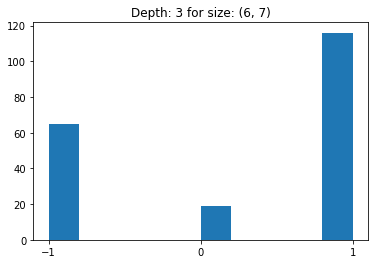

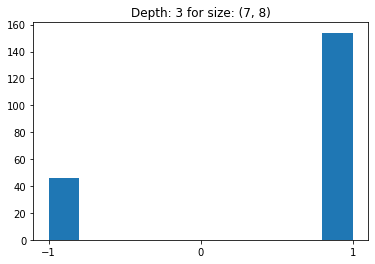

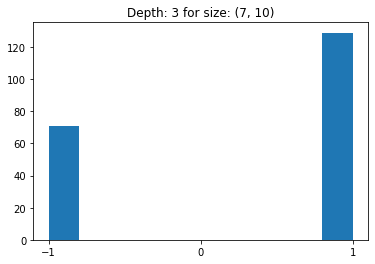

In [29]:

with open('alpha_beta_history_depth3.pkl', 'rb') as dbfile:
    history=pickle.load(dbfile)

for b_size, hist in history:
    h=[a[1] for a in hist]
    plt.hist(h)
    plt.xticks([-1,0,1])
    plt.title('Depth: 3 for size: '+str(b_size))
    plt.show()


In [13]:

for b_size, hist in history:
    h=[a[1] for a in hist]
    wins=len([a for a in h if a==1])
    print('The winning chance of the agent for depth 3 and board size',b_size,'is', wins/200)


The winning chance of the agent for depth 3 and board size (6, 7) is 0.58
The winning chance of the agent for depth 3 and board size (7, 8) is 0.77
The winning chance of the agent for depth 3 and board size (7, 10) is 0.645


In [30]:
for b_size, hist in history:
    t=[a[0] for a in hist]
    total_time=sum([a for a in t])
    print('The total time to find the solution for depth 3 and board size',b_size,'is', total_time)


The total time to find the solution for depth 3 and board size (6, 7) is 72.83504724502563
The total time to find the solution for depth 3 and board size (7, 8) is 103.60080528259277
The total time to find the solution for depth 3 and board size (7, 10) is 283.78727316856384


## Results for Depth 1

In [ ]:
board_sizes_to_check = [(6,7), 
                        (7,8), 
                        (7,10)]

history=[]
for b_size in board_sizes_to_check:
    hist=[]
    for i in range(200):
        tic=time()
        game = ConnectSin(board_size=b_size,silent=True)
        a=game.run()
        toc=time()
        hist.append((toc-tic,a))
        print(b_size,'run:',i+1,',time:',toc-tic,'s r:',a)
    history.append((b_size,hist))



In [19]:

with open('alpha_beta_history_depth1.pkl', 'wb') as dbfile:
    pickle.dump(history, dbfile)


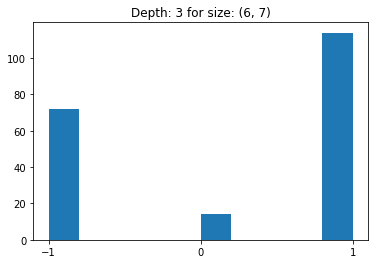

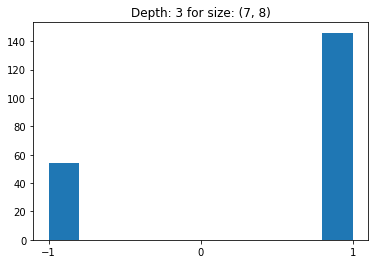

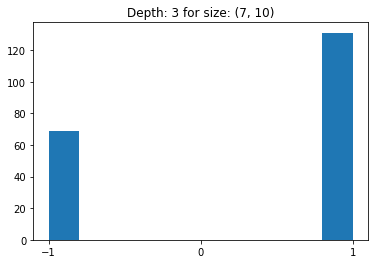

In [31]:

with open('alpha_beta_history_depth1.pkl', 'rb') as dbfile:
    history=pickle.load(dbfile)

for b_size, hist in history:
    h=[a[1] for a in hist]
    plt.hist(h)
    plt.xticks([-1,0,1])
    plt.title('Depth: 3 for size: '+str(b_size))
    plt.show()


In [23]:

for b_size, hist in history:
    h=[a[1] for a in hist]
    wins=len([a for a in h if a==1])
    print('The winning chance of the agent for depth 1 and board size',b_size,'is', wins/200)


The winning chance of the agent for depth 1 and board size (6, 7) is 0.57
The winning chance of the agent for depth 1 and board size (7, 8) is 0.73
The winning chance of the agent for depth 1 and board size (7, 10) is 0.655


In [32]:
for b_size, hist in history:
    t=[a[0] for a in hist]
    total_time=sum([a for a in t])
    print('The total time to find the solution for depth 3 and board size',b_size,'is', total_time)


The total time to find the solution for depth 3 and board size (6, 7) is 9.481656551361084
The total time to find the solution for depth 3 and board size (7, 8) is 9.673524141311646
The total time to find the solution for depth 3 and board size (7, 10) is 24.857770204544067


As it can be seen, using the Alpha-Beta pruning minimax makes the algorithm 12 times faster. The order of the successors of each node is an essential factor in the speed of the algorithm. In this code, the successors are unordered because we find them based on the possible moves. But it is better to sort the minimizer nodes accending and the maximizer nodes descending to get better performance on the algorithm. 

# Final Results

| Algorithm  | Board Size | Depth | Winning Chance (%) | Time Consumption (sec) |
| ---------- | ---------- | ----- | ------------------ | ---------------------- |
| MniMax     | (6, 7)     | 3     | 55%                | 1176.7                 |
| Alpha-Beta | (6, 7)     | 3     | 58%                | 72.8                   |
| MniMax     | (6, 7)     | 1     | 60%                | 32.2                   |
| Alpha-Beta | (6, 7)     | 1     | 57%                | 9.5                    |
| MniMax     | (7, 8)     | 3     | 74%                | 2363                   |
| Alpha-Beta | (7, 8)     | 3     | 77%                | 103.6                  |
| MniMax     | (7, 8)     | 1     | 76%                | 37.4                   |
| Alpha-Beta | (7, 8)     | 1     | 73%                | 9.7                    |
| MniMax     | (7, 10)    | 3     | 65%                | 9616.1                 |
| Alpha-Beta | (7, 10)    | 3     | 65%                | 283.8                  |
| MniMax     | (7, 10)    | 1     | 63%                | 99.9                   |
| Alpha-Beta | (7, 10)    | 1     | 66%                | 24.9                   |
